# Prática 1: Exploração de Dados

### Lucas Yudi Sugi - 9293251
### Kelvin Guilherme de Oliveira - 9293286

Este trabalho tem como objetivo a formulação de hipóteses e a análise de dois conjuntos de dados distintos, escolhidos a partir de algumas opções disponibilizadas pelos mentores do trabalho. Em primeiro lugar será exibido o passo-a-passo, para responder as 5 questões solicitadas na descrição, relativo ao dataset mais simples, e, posteriormente, setá mostrado o passo-a-passo referente ao dataset mais complexo.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Dataset 1: Diabetes

A escolha desse dataset foi baseada em uma análise por cima de todos os conjuntos disponibilizados, levando em consideração o conhecimento da semântica dos dados dataset.

Inicialmente iremos avaliar graficamente o dataset para ter um melhor entendimento do mesmo.

In [1]:
#Importando todos os modulos necessarios para a analise exploratoria de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#Leitura do dataset com o pandas
dataset = pd.read_table('./datasets/diabetes/diabetes.tab.txt')

#Mostrando dataset (Apenas uma parte)
dataset.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


A partir da análise anterior e da leitura do site https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html podemos identificar qual é o objetivo dessa análise exploratória dos dados, assim como quais são os atributos de interesse.

Desse modo, temos como objetivo entender melhor nosso dataset realizando limpezas, transformações, descobertas de insights, etc., para que os algoritmos de Machine Learning possam fazer melhores previsões.

<b>Questão 1 - Formular questões que possam ser respondidas/entendidas com o conjunto de dados.</b>

1 - Como a progressão da doença é impactada pelo sexo do paciente ?<br>
2 - Como a progressão da doença é impactada pela faixa etária do paciente ?<br>
3 - Qual medida está mais correlacionada com a progressão da doença ?<br>

<b>Questão 2 - Escolher 5 atributos que representem bem o problema, justificar e analisar os seus tipos e operações.</b>

Os atributos foram escolhidos de forma que fizessem sentido para responder as questões acima, de acordo com os seus valores visíveis e a semântica relacionada de cada um. Sendo assim, os atributos escolhidos, com os seus respectivos tipos, são:<br>
&nbsp;&nbsp;&nbsp;&nbsp;Age - Numérico <br>
&nbsp;&nbsp;&nbsp;&nbsp;Sex - Simbólico categórico <br>
&nbsp;&nbsp;&nbsp;&nbsp;Ldl (S1) - Numérico intervalar <br>
&nbsp;&nbsp;&nbsp;&nbsp;Hdl (S2) - Numérico racional / Numérico intervalar <br>
&nbsp;&nbsp;&nbsp;&nbsp;Glu (S3) - Numérico intervalar <br>

Deve-se salientar que tais atributos foram escolhidos, por acreditarmos que eles representam melhor o problema. Isso foi possível, após entendermos um pouco como funciona a diabete (https://pt.wikipedia.org/wiki/Diabetes_mellitus). Ou seja, após a análise do domínio do problema, avaliamos que estes atributos são os que mais afetam a diabete.

Para os atributos Age, Ldl, Hdl e Glu as operações que fazem sentindo são: média, moda, correlação, entre outras estatísticas.<br>Já para o atributo Sex, faz sentido realizar uma operação de contagem, por exemplo.

<b>Questão 3 - Fazer uma análise exploratória com base nase medidas vistas em aula.</b>

Iremos realizar uma análise exploratória dos dados na tentativa de responder as perguntas elaboradas na Questão 1. Inicialmente verificaremos a relação entre os genêros (atributo Sex) com a progressão da diabete, por meio da média e do desvio padrão. Isso nos ajudará a responder a pergunta 1.

In [2]:
#Extração da coluna SEX com filtro para cada genero
male = dataset[dataset.SEX == 1].Y
female = dataset[dataset.SEX == 2].Y

print("Progressao media e desvio padrao de diabetes para os homens: " + str(male.mean()) + " " + str(male.std()))
print("Progressao media e desvio padrao de diabetes para as mulheres: " + str(female.mean())+" " +str(female.std()))

Progressao media e desvio padrao de diabetes para os homens: 149.0212765957447 75.90578093636823
Progressao media e desvio padrao de diabetes para as mulheres: 155.66666666666666 78.45331306004283


Uma vez que a análise do impacto do atributo genêro foi realizada, iremos verificar a relação dos outros atributos. Para isso, é necessário extrair apenas o fundamental do dataset (atributos Age, Ldl, Hdl e Glu).

In [3]:
#Extracao dos atributos necessários
diabete = dataset.iloc[:,[0,4,5,6]].copy()

#Renomeando columnas
diabete.columns = ['AGE','LDL','HDL','GLU']

#Novo dataset
diabete.head()

,AGE,LDL,HDL,GLU
0,59,157,93.2,38.0
1,48,183,103.2,70.0
2,72,156,93.6,41.0
3,24,198,131.4,40.0
4,50,192,125.4,52.0


In [4]:
#Extracao da classe
target = dataset.iloc[:,[10]].copy()

#Target ou classe
target.head()

,Y
0,151
1,75
2,141
3,206
4,135


Agora que a extração dos dados foi realizada, nós iremos analisar graficamente a correlação entre os atributos e a variável de resposta (target). Isso porque é com esta medida estatística que será possível responder as questões 2 e 3 feitas anteriormente.

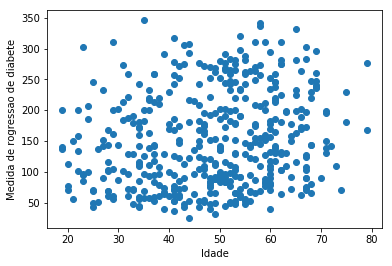

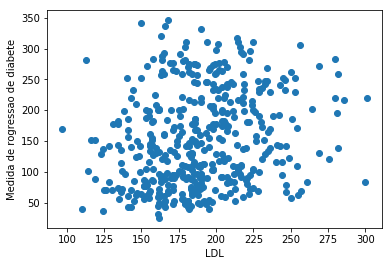

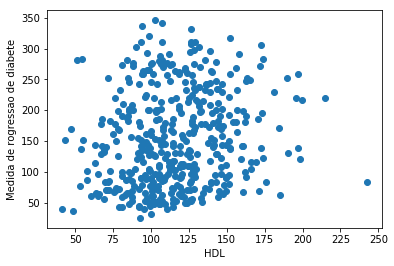

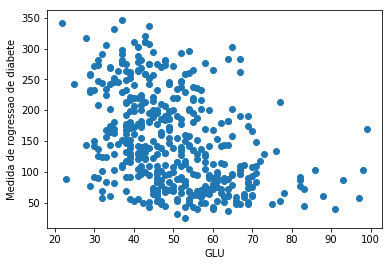

In [5]:
#Avaliando a idade com a progressao da doenca
plt.scatter(diabete.AGE.values,target.Y.values)
plt.xlabel('Idade')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o LDL com a progressao da doenca
plt.scatter(diabete.LDL.values,target.Y.values)
plt.xlabel('LDL')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o HDL com a progressao da doenca
plt.scatter(diabete.HDL.values,target.Y.values)
plt.xlabel('HDL')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

#Avaliando o GLU com a progressao da doenca
plt.scatter(diabete.GLU.values,target.Y.values)
plt.xlabel('GLU')
plt.ylabel('Medida de rogressao de diabete')
plt.show()

Agora também iremos analisar os dados de forma numérica.

In [6]:
print("Correlacao entre idade e diabete " + str(np.corrcoef(diabete.AGE.values,target.Y.values)[0,1]))
print("Correlacao entre LDL e diabete " + str(np.corrcoef(diabete.HDL.values,target.Y.values)[0,1]))
print("Correlacao entre HDL e diabete " + str(np.corrcoef(diabete.LDL.values,target.Y.values)[0,1]))
print("Correlacao entre GLU e diabete " + str(np.corrcoef(diabete.GLU.values,target.Y.values)[0,1]))

Correlacao entre idade e diabete 0.18788875071891972
Correlacao entre LDL e diabete 0.17405358696874254
Correlacao entre HDL e diabete 0.21202248101455065
Correlacao entre GLU e diabete -0.39478925067091863


<b>Questão 4 - Reanalisar 3 as questões elaboradas no primeiro exercício, com base na análise exploratória efetuada no exercício anterior.</b>

Com a análise feita anteriormente, foi possível elaborar as seguintes hipóteses para as questões:

1 - Como a média da progressão de diabete é muito similar entre os dois genêros, assim como o seu desvio padrão é relativamente próximo, podemos inferir que o genêro não possui relação direta com a progressão da doença.<br>
2 - A partir do gráfico e das medidas de correlação extraídas no processo de análise, fica claro que, da mesma maneira que na pergunta 1, não existe uma relação direta entre a idade dos pacientes e a progreção da diabete.<br>
3 - Também a partir do gráfico e das medidas de correlação extraídas no processo realizado anteriormente, verificamos que a medida Glu é aquela que possui mais dependência com a progressão da doença (quase -0.40). Entretanto, tal correlação é negativa, o que nos indica que, quanto maior o nível de glutamina no sangue, menor é a probabilidade da doença se desenvolver.<br>

<b>Questão 5 - Analisar os problemas do conjunto de dados escolhido e os seus impactos na formulação/entendimento dos dados.</b>

Uma vez que a análise foi realizada, pode-se concluir que o dataset não possui nenhum problema de "missing values" ou outliers. Julgamos que esse fato se deve ao dataset ser conhecido e já ter sido estudado/tratado há bastante tempo. Por conta disso, não houveram problemas para analisar o conjunto e chegar as hipóteses demonstradas no exercício anterior.

### --------------------------------------------------------------------------------------------------------------------------------------------------------

### Dataset 2: Falhas de Plantio

De forma similar à aplicada no primeiro conjunto de dados, iremos avaliar o dataset graficamente para tentar compreendê-lo melhor.



In [7]:
#Leitura do dataset com o pandas
dataset = pd.read_csv('./datasets/agro/falhas_plantio_hashing.csv',sep=';',header=0,encoding='latin1')

#Mostrando dataset (Apenas uma parte)
dataset.head()

,Unnamed: 0,Fazenda,Zona,Talhao,Nome_Estacao_SM1,INSTANCIA1,CD_EMPRESA1,Tipo_prop1,CD_SAFRA,Area_Plantio,...,EPT_mm_December,EPT_mm_February,EPT_mm_January,EPT_mm_July,EPT_mm_June,EPT_mm_March,EPT_mm_May,EPT_mm_November,EPT_mm_October,EPT_mm_September
0,1,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,71db8a6cad03244e6e50f0ad8bc95a65,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,24.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,8f3571abef23f6aca0f7b8666a74e7e0,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,13.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8065492367f538812f3928137e492c36,dd4ad37ee474732a009111e3456e7ed7,fa5a4df7ac0f9782037da890557fd8b8,9d808d5988da444614e97bb46dfcc388,4770fa66c5954411ff928125d447259b,c7f66da1cae4f223b9bae717f05900f7,c7f66da1cae4f223b9bae717f05900f7,21617,11.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,4b5630ee914e848e8d07221556b0a2fb,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,23.16,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1
4,5,f648ef67be4ec669a2cf9f44a14ad6f4,3a289991381335a0fc94ad80f79fe88e,c01f179e4b57ab8bd9de309e6d576c48,bb4b9c9cb3eb0376a9c896805d07adcb,8fdf2b1125e197b694ab48c195f7743f,40755f30599581bfb1186f077db8f580,c01f179e4b57ab8bd9de309e6d576c48,21617,7.36,...,157.8,128.95,134.18,99.63,75.31,139.11,83.1,152.3,151.4,130.1


A partir dos dados exibidos acima e da análise do dicionário de dados, podemos definir o nosso objetivo, que é realizar uma análise exploratória dos dados para identificar "missing values" e outliers, assim como realizar limpezas e transformações nos dados para obter uma melhor compreensão e para que os mesmos sejam adequados na entrada de um algoritmo de aprendizado de máquina.

Uma vez que os objetivos foram definidos, iremos responder as questões solicitadas abaixo.

<b>Questão 1 - Formular questões que possam ser respondidas/entendidas com o conjunto de dados.</b>

1) O ph do solo segue uma distribuição normal?<br>
2) A velocidade média de plantio segue uma normal ? <br>
3) Qual a relação entre o ph do solo e os componentes potassio, calcio e magnesio ?

<b>Questão 2 - Escolher 5 atributos que representem bem o problema, justificar e analisar os seus tipos e operações.</b>

Dentro todos os atributos, escolhemos aqueles que melhor se adequam a resolver nosso objetivo, assim como possuem uma mais fácil compreensão dos dados. A seguir, temos a aprensentação dos atributos:

Ph - Ph do solo (Numérico intervalar) <br> 
VM - Velocidade média de plantio (Numérico intervalar) <br>
K - Potassio (Numérico intervalar) <br>
Ca - Cálcio (Numérico intervalar) <br>
Mg - Magnésio (Numérico intervalar) <br>
 
Estas características foram escolhidas por acreditarmos que são as mais relevantes para descrever o problema. Ph e VM são necessários para responder as questões 1 e 2 e K,Ca,Mg são componentes que mais afetam o Ph segundo http://www.nutricaodesafras.com.br/ph-do-solo#soil-acidity.

As operações que são possível para os atributos são somas,diferenças, multiplicações e divisões. Além de ser possível calcular estatísticas como média, desvio padrão, correlação e etc.

<b>Questão 3 - Fazer uma análise exploratória com base nase medidas vistas em aula.</b>

Iremos realizar uma análise exploratória dos dados para tentar responder as perguntas realizadas na questão 1. Assim, inicialmente iremos verificar a normalidade do Ph e velocidade média do solo graficamente

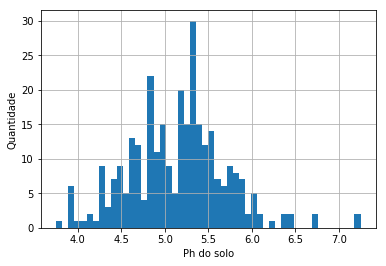

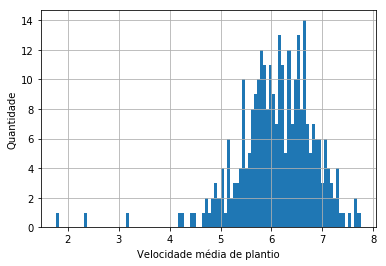

In [8]:
#Ignorando os Nan values
agro = dataset.dropna()

agro['Ph'].hist(bins=50)
plt.xlabel('Ph do solo')
plt.ylabel('Quantidade')
plt.show()

agro['VM'].hist(bins=100)
plt.xlabel('Velocidade média de plantio')
plt.ylabel('Quantidade')
plt.show()

A partir dessa análise gráfica será possível responder as perguntas 1 e 2. Agora, devemos calcular o relacionamento entre potassio,calcio e magnesio com o ph do solo. Para realizar isso, utilizaremos novamente a medida de correlação graficamente e numericamente

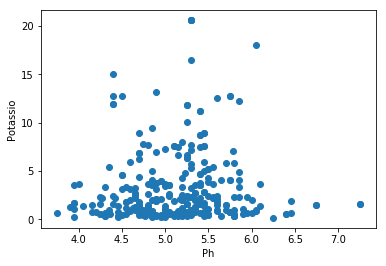

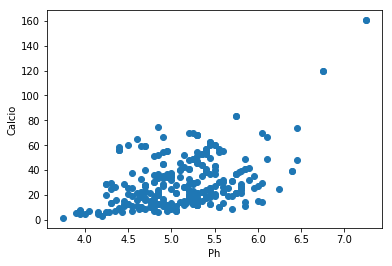

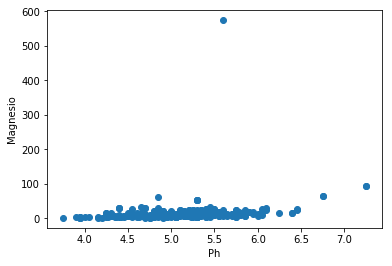

In [9]:
plt.scatter(agro['Ph'].values,agro['K'].values)
plt.xlabel('Ph')
plt.ylabel('Potassio')
plt.show()

plt.scatter(agro['Ph'].values,agro['Ca'].values)
plt.xlabel('Ph')
plt.ylabel('Calcio')
plt.show()

plt.scatter(agro['Ph'].values,agro['Mg'].values)
plt.xlabel('Ph')
plt.ylabel('Magnesio')
plt.show()

In [10]:
print("Correlacao entre Ph e potassio " + str(np.corrcoef(agro['Ph'].values,agro['K'].values)[0,1]))
print("Correlacao entre Ph e calcio " + str(np.corrcoef(agro['Ph'].values,agro['Ca'].values)[0,1]))
print("Correlacao entre Ph e magnesio " + str(np.corrcoef(agro['Ph'].values,agro['Mg'].values)[0,1]))

Correlacao entre Ph e potassio 0.04781524030289483
Correlacao entre Ph e calcio 0.48155120276587393
Correlacao entre Ph e magnesio 0.20511033535914167


<b>Questão 4 - Reanalisar 3 as questões elaboradas no primeiro exercício, com base na análise exploratória efetuada no exercício anterior.</b>

Com a análise realizada, podemos efetuar as seguintes hipóteses para as perguntas formuladas: <br>
1) O Ph do solo entre as várias observações feitas tende a seguir uma normal, porque o seu histograma tende a seguir tal modelo.<br>
2) A mesma ideia do Ph equivale para a velocidade média de plantio.<br>
3) Verificamos graficamente e numericamente que quem possui uma correlação,e portanto uma certa dependência entre os dados, é o Ph com o cálcio. Sabemos que quimicamente esse é um resultado a ser esperado, e como podemos ver existe uma correlação de aproximadamente 0.5, o que sugere que um aumento do cálcio implica mais um menos em um aumento do Ph do solo.<br>

<b>Questão 5 - Analisar os problemas do conjunto de dados escolhido e os seus impactos na formulação/entendimento dos dados.</b>

O conjunto de dados proposto possui diversos problemas de "missing values". Como não temos conhecimento o suficiente sobre o plantio ou sobre o dataset e nem temos a disposição um especialista da área, decidimos excluir tais tuplas que possuem esses valores. Lembramos que nem sempre isso é o ideal. Muitas vezes é possível inferir tais valores, mas como escrito anteriomente, isso não é possível em nosso caso.

Além dos "missing values", notamos um ponto imporante ao analisar os gráficos de correlação. Em basicamente todos existem outiliers, fato que fica mais evidente no gráfico entre Ph e e Magnésio. Tais valores, devem ser investigados para saber se existem porque houve um erro na digitação, erro na amostragem ou se ele for um valor válido, então o porque dele não seguir um padrão. Salientamos que tal análise é fundamental, pois estes outliers podem provocar tremendas alterações nas previsões dos algoritmos de machine learning.